<a href="https://colab.research.google.com/github/fedhere/MLPNS2021/blob/main/HW4_clustering/imagesegwKM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# your basic imports
from __future__ import print_function
import os
import sys
import numpy as np
import pylab as pl
pl.rcParams['font.size'] = 20
import scipy.ndimage as nd
import skimage.io as io



In [26]:
from google.colab import drive
from IPython.display import Image
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
cd /content/drive/Shareddrives/PUS2020/

/content/drive/Shareddrives/PUS2020


In [29]:
op = io.imread("data/Madrid.jpg")

In [32]:
op

array([[[186, 126,  92],
        [152, 149, 140],
        [169, 165, 154],
        ...,
        [ 75,  67,  56],
        [140, 114,  91],
        [124, 104,  97]],

       [[207, 158, 128],
        [160, 155, 136],
        [ 69,  87,  89],
        ...,
        [130,  99,  68],
        [ 89,  82,  64],
        [ 57,  50,  42]],

       [[224, 182, 160],
        [155, 156, 140],
        [ 31,  50,  56],
        ...,
        [149, 107,  83],
        [176, 126,  93],
        [148, 111,  84]],

       ...,

       [[ 58,  50,  37],
        [ 66,  69,  38],
        [143, 121,  71],
        ...,
        [109, 118,  73],
        [201, 171, 135],
        [175, 158, 128]],

       [[ 36,  43,  25],
        [ 51,  59,  46],
        [ 75,  90,  61],
        ...,
        [165, 155, 128],
        [202, 175, 145],
        [207, 180, 150]],

       [[ 16,  39,  19],
        [ 26,  53,  38],
        [ 34,  66,  43],
        ...,
        [195, 164, 136],
        [179, 149, 121],
        [192, 151, 121]]

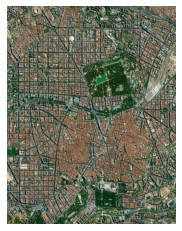

In [33]:
pl.imshow(op)
pl.axis('off');

In [34]:
from sklearn.cluster  import KMeans

In [35]:
# make sure the image only contains 3 color channels:
op.shape

(1000, 774, 3)

In [37]:
from sklearn import preprocessing
Xopscaled = preprocessing.minmax_scale(op.reshape(op.shape[0] * op.shape[1], 3).astype(float), axis=1) 
Xopscaled.reshape(op.shape)[200, 700]

array([0.        , 1.        , 0.46428571])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


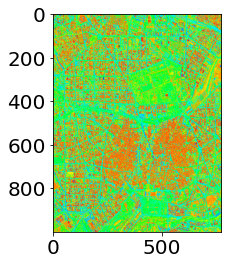

In [38]:
#show the prepreocessed image
pl.imshow(Xopscaled.reshape(op.shape));


# cluster with k-means in 4 clusters, let the center initialization be whatever sklearn think is best (kmeans++)



In [39]:
nclusters = 4

In [40]:
kmop = KMeans(n_clusters=nclusters, random_state=302).fit(Xopscaled)

print the cluster cluster centers and verbalize what they represent 

In [41]:
kmop.cluster_centers_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=302, tol=0.0001, verbose=0)

In [ ]:
kmop.cluster_centers_

array([[ 6.06468408e-02,  9.97211781e-01,  1.99796167e-01],
       [ 9.99944670e-01,  4.51191256e-01,  2.24924347e-03],
       [ 6.86553492e-04,  8.94116020e-01,  8.93580231e-01],
       [ 8.49388160e-01,  9.25642031e-01, -8.74300632e-14]])

In [45]:
mycenters = np.array([[1, 0 , 0 ], [0, 1, 0], [0, 0, 1], [1, 1, 1]])

In [46]:
kmop = KMeans(n_clusters=nclusters, init = mycenters,
              random_state=302).fit(Xopscaled)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  


In [48]:
kmop.cluster_centers_

array([[9.87193332e-01, 5.72601522e-01, 1.55337900e-03],
       [2.78007064e-01, 9.95322328e-01, 1.12562989e-02],
       [9.50576484e-04, 8.71801174e-01, 9.46481154e-01],
       [5.16753307e-13, 1.00000000e+00, 3.99361278e-01]])

In [55]:
kmop.labels_[:10]

array([0, 0, 0, 1, 2, 2, 0, 0, 0, 0], dtype=int32)

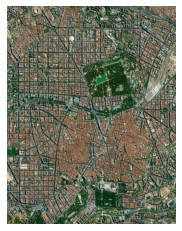

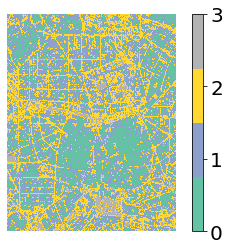

In [51]:
from matplotlib import cm
pl.imshow(op)
pl.axis('off');
pl.figure()
mycmap = cm.get_cmap('Set2', nclusters)
pl.imshow(kmop.labels_.reshape(op.shape[:2]), cmap=mycmap)
pl.axis('off')
pl.colorbar()

# identify from the image the cluster containing the green patch on the botton left and assuming the clustering picked up the greenery calculate the fraction of pixels containing vegetation in the image

In [53]:
print("fraction of vegetation pixel {:.3f}".format((kmop.labels_ == 2).sum() * 1.0 / len(kmop.labels_)))

fraction of vegetation pixel 0.208


cluster again, with 4 clusters, but now give it the center corresponding to pure colors:
remember that each pixel color is encoded by the intensity of the R G and B channel:

pure red => RGB=[1,0,0]

pure green => RGB=[0,1,0]

pure blue => RGB=[0,0,1]

also add black: RGB=[0,0,0]

white: RGB=[1,1,1]

In [ ]:
kmop = KMeans(n_clusters=nclusters, init=(np.array([[1,0,0], [0,1,0], [0,0,1], [0,0,0]])), 
              random_state=302).fit(Xopscaled)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  


In [ ]:
kmop.cluster_centers_

array([[ 9.75946525e-01,  5.89407230e-01,  1.49229869e-03],
       [ 1.13637364e-01,  1.00000000e+00,  1.63398135e-01],
       [ 7.45815966e-04,  8.99416056e-01,  8.75281633e-01],
       [-4.44089210e-16,  2.77555756e-15, -2.94209102e-15]])

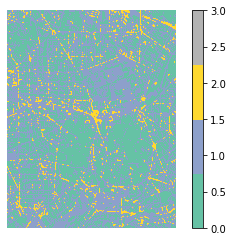

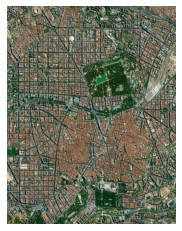

In [ ]:
pl.imshow(kmop.labels_.reshape(op.shape[:2]), cmap=mycmap)
pl.axis('off')
pl.colorbar()
pl.figure()
pl.imshow(op)
pl.axis('off');

In [ ]:
print("fraction of vegetation pixel {:.3f}".format((kmop.labels_ == 1).sum() * 1.0 / len(kmop.labels_)))

fraction of vegetation pixel 0.288


looking at the maps, identify some clusters that were associated with greenery in the first map (same cluster as the big triangular park bottom left) and are not associated with greenery in the second, or viceversa.

discuss the results 

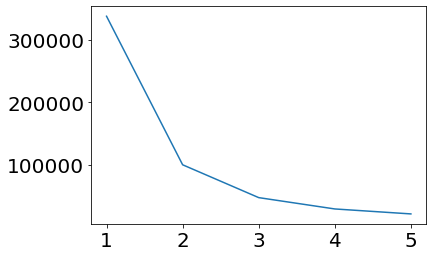

In [56]:
inertias = []
for i in range(1,6):
  kmop = KMeans(n_clusters=i, random_state=302).fit(Xopscaled)
  inertias.append(kmop.inertia_)

pl.plot(range(1, 6), inertias)

repeat the exercize with this image of california after the fires

In [ ]:
forest = io.imread("data/kalbar_drone_190113-768x512.jpg") 

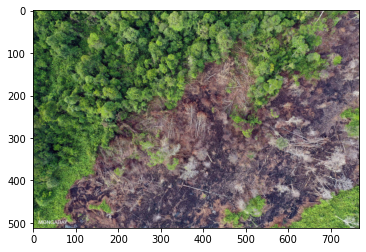

In [ ]:
pl.imshow(forest)